In [289]:
import pandas as pd
df = pd.read_csv(r"C:\Users\simon\Documents\Datasets\quality_of_life_indices_by_country.csv")
df.head()
#print(df.dtypes)

,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Year
0,1,Switzerland,222.9,146.5,73.2,66.3,126.0,7.3,25.6,24.1,-,2015
1,2,Germany,195.9,111.8,71.5,75.6,76.3,6.6,31.1,28.3,-,2015
2,3,Sweden,193.9,110.9,57.9,76.3,82.9,9.2,26.9,15.1,-,2015
3,4,United States,192.5,126.1,50.0,67.8,76.5,2.6,36.0,31.4,-,2015
4,5,Finland,190.2,101.2,70.5,69.4,89.7,7.0,33.2,14.9,-,2015


In [290]:
#Analizziamo i dati per pulirli eventualmente
print(df.select_dtypes(include=['object']).nunique())

Country           98
Climate Index    414
Year              20
dtype: int64


In [291]:
#98 nazioni uniche, vediamo Climate Index (voglio solo tipo di dato numerico), gli anni ci permetteranno di analizzare i trend
print(df["Climate Index"].unique())

['-' '70.5' '70.6' '88.4' '63.0' '77.3' '63.8' '76.3' '56.3' '90.8' '61.8'
 '32.6' '67.6' '91.7' '81.6' '46.2' '79.6' '62.5' '78.3' '85.6' '73.1'
 '51.3' '63.5' '81.9' '87.1' '77.0' '86.2' '16.8' '91.4' '64.3' '85.7'
 '75.3' '67.0' '5.9' '77.8' '66.9' '83.9' '74.2' '58.8' '24.4' '84.5'
 '80.6' '19.7' '39.9' '72.6' '46.6' '74.6' '41.2' '-66.6' '79.7' '10.9'
 '50.4' '8.0' '-27.0' '-23.3' '-71.2' '66.1' '63.4' '86.0' '52.0' '62.1'
 '67.1' '89.2' '34.8' '67.4' '93.0' '55.2' '78.7' '52.3' '51.2' '81.3'
 '82.3' '44.6' '72.0' '66.3' '49.0' '76.7' '86.7' '18.3' '88.3' '65.1'
 '35.7' '63.9' '88.0' '65.6' '82.5' '69.2' '7.2' '88.9' '68.4' '78.2'
 '82.7' '9.3' '24.9' '70.0' '88.6' '81.5' '75.5' '14.5' '29.8' '71.5'
 '62.4' '48.1' '38.5' '-71.5' '75.6' '9.2' '50.5' '4.4' '-37.7' '-73.7'
 '-36.9' '-11.6' '58.0' '64.2' '85.4' '35.8' '67.9' '92.2' '72.8' '60.5'
 '61.9' '69.3' '78.9' '59.1' '82.0' '44.3' '70.2' '71.0' '49.3' '65.3'
 '61.2' '75.2' '73.9' '81.0' '24.5' '87.3' '31.9' '18.0' '88.7' '64.5'

In [292]:
#Abbiamo il trattino. Sostituiamo i valori "-" con NaN e convertiamo in numerico
df["Climate Index"] = pd.to_numeric(df["Climate Index"], errors="coerce")
#Verifichiamo
print(df["Climate Index"].unique())

[  nan  70.5  70.6  88.4  63.   77.3  63.8  76.3  56.3  90.8  61.8  32.6
  67.6  91.7  81.6  46.2  79.6  62.5  78.3  85.6  73.1  51.3  63.5  81.9
  87.1  77.   86.2  16.8  91.4  64.3  85.7  75.3  67.    5.9  77.8  66.9
  83.9  74.2  58.8  24.4  84.5  80.6  19.7  39.9  72.6  46.6  74.6  41.2
 -66.6  79.7  10.9  50.4   8.  -27.  -23.3 -71.2  66.1  63.4  86.   52.
  62.1  67.1  89.2  34.8  67.4  93.   55.2  78.7  52.3  51.2  81.3  82.3
  44.6  72.   66.3  49.   76.7  86.7  18.3  88.3  65.1  35.7  63.9  88.
  65.6  82.5  69.2   7.2  88.9  68.4  78.2  82.7   9.3  24.9  70.   88.6
  81.5  75.5  14.5  29.8  71.5  62.4  48.1  38.5 -71.5  75.6   9.2  50.5
   4.4 -37.7 -73.7 -36.9 -11.6  58.   64.2  85.4  35.8  67.9  92.2  72.8
  60.5  61.9  69.3  78.9  59.1  82.   44.3  70.2  71.   49.3  65.3  61.2
  75.2  73.9  81.   24.5  87.3  31.9  18.   88.7  64.5  82.6  90.7   8.9
  73.3  66.5  77.1  89.4  25.   73.2  60.7  20.1  69.4  70.8  29.7  42.5
  38.7   2.4  49.9  10.7   9.6 -20.2 -44.1 -79.4 -12.

In [293]:
#Ci verrebbe da convertire anno in formato intero ma non possiamo per come sono scritti
df["Year"].unique()

array(['2015', '2015/2', '2016', '2016/2', '2017', '2017/2', '2018',
       '2018/2', '2019', '2019/2', '2020', '2020/2', '2021', '2021/2',
       '2022', '2022/2', '2023', '2023/2', '2024', '2024/2'], dtype=object)

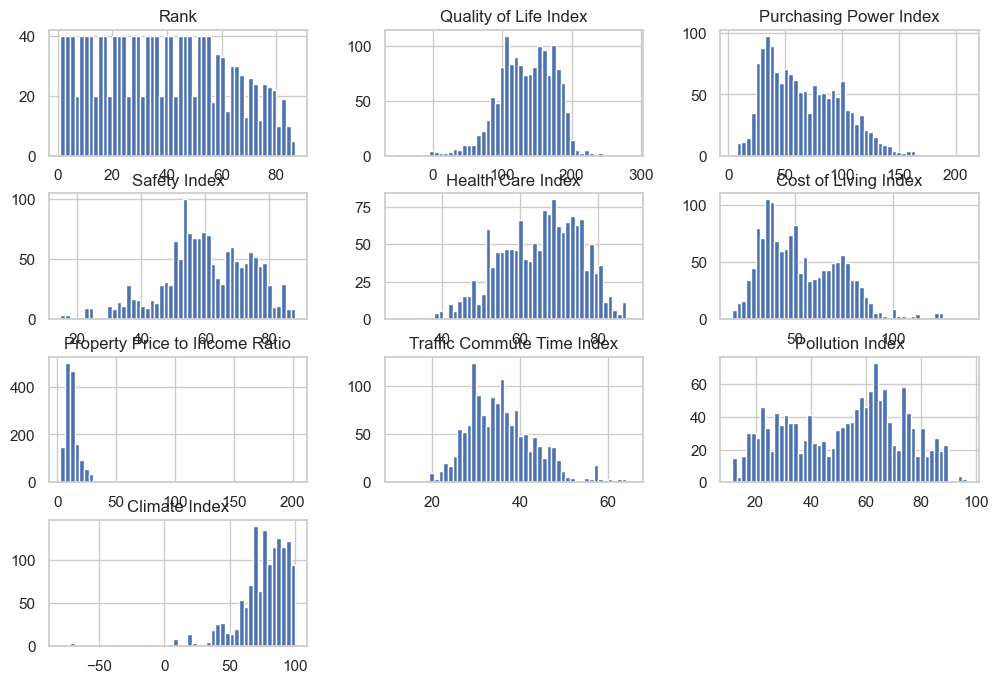

In [294]:
import matplotlib.pyplot as plt

df.hist(figsize=(12,8), bins=50) #Ci fornisce una panoramica iniziale
plt.show()

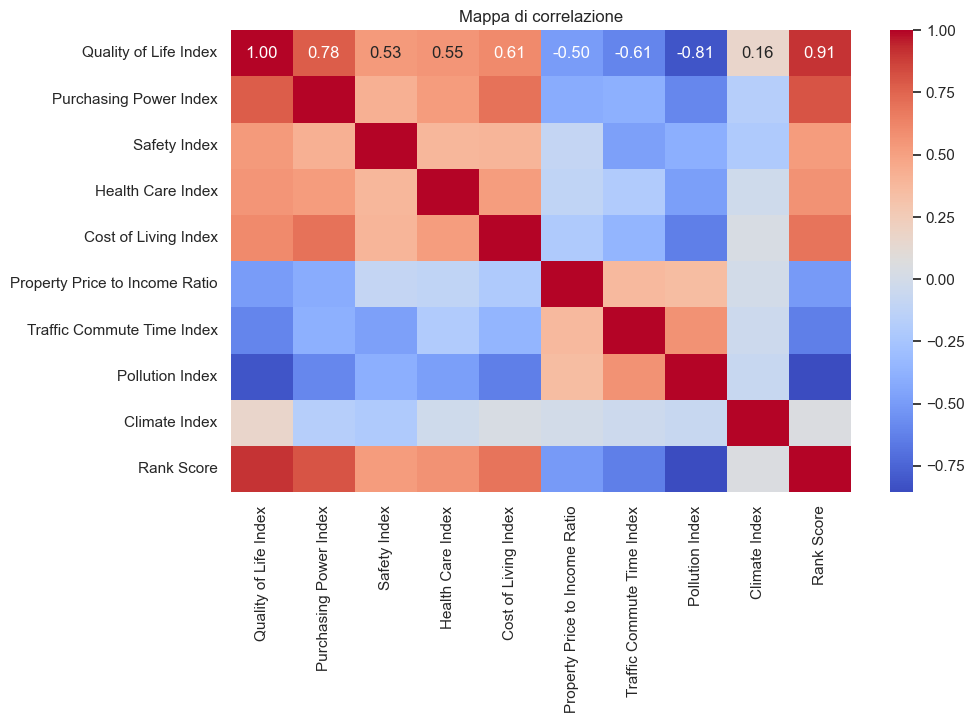

In [295]:
#Analizziamo come i vari indici sono correlati tra loro ed in particolare con il Quality of Life Index
import seaborn as sns

#Creo una copia del df in modo da fare qualche piccola modifica per il grafico di correlazione senza intaccare quello originale
df_corr = df.copy()
df_corr["Rank Score"] = df["Rank"].max() - df["Rank"] + 1  # Rank più virtuosi(1,2,3) diventano valori più alti di Rank Score rendendo sensata la correlazione con buoni indici
del df_corr["Rank"]

plt.figure(figsize=(10,6))
sns.heatmap(df_corr.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mappa di correlazione")
plt.show()

#Come vediamo il parametro che incide di più nel Rank Score (Rank) è ovviamente il Quality of Life Index, essendo un composito degli altri.

Pollution Index                   0.812679
Purchasing Power Index            0.779720
Traffic Commute Time Index        0.608260
Cost of Living Index              0.607517
Health Care Index                 0.552464
Safety Index                      0.532045
Property Price to Income Ratio    0.497310
Climate Index                     0.159897
Name: Quality of Life Index, dtype: float64


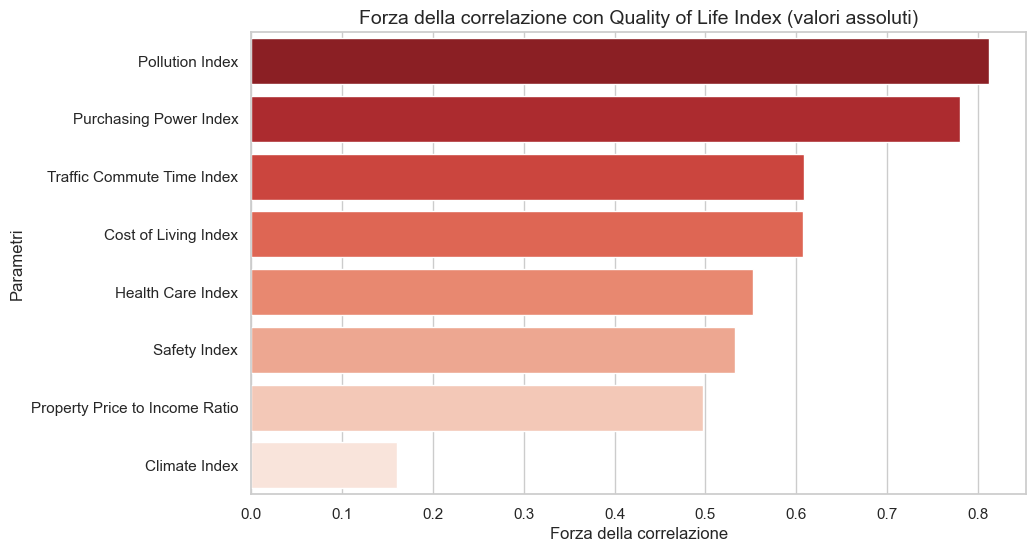

In [296]:
#Cerchiamo di analizzare con un altro grafico quali elementi influenzano di più il parametro composito di Quality of Life Index

#Calcoliamo la correlazione con il Quality of Life Index
correlations = df.select_dtypes(include=["number"]).corr()["Quality of Life Index"].dropna()

#Rimuoviamo la correlazione con sé stesso (che sarebbe sempre 1) e con il Rank
correlations = correlations.drop("Quality of Life Index")
correlations = correlations.drop("Rank")

correlations = correlations.abs().sort_values(ascending=False) #Rendiamo tutti i valori assoluti in modo da avere un confronto coerente e li ordiniamo

print(correlations) 

# Creare il grafico
plt.figure(figsize=(10,6))
sns.barplot(x=correlations.values, y=correlations.index, palette="Reds_r")

# Etichette e titolo
plt.title("Forza della correlazione con Quality of Life Index (valori assoluti)", fontsize=14)
plt.xlabel("Forza della correlazione")
plt.ylabel("Parametri")

plt.show()

                                Cost of Living Index  Purchasing Power Index  \
Cost of Living Index                        1.000000                0.701612   
Purchasing Power Index                      0.701612                1.000000   
Property Price to Income Ratio             -0.209981               -0.413017   

                                Property Price to Income Ratio  
Cost of Living Index                                 -0.209981  
Purchasing Power Index                               -0.413017  
Property Price to Income Ratio                        1.000000  


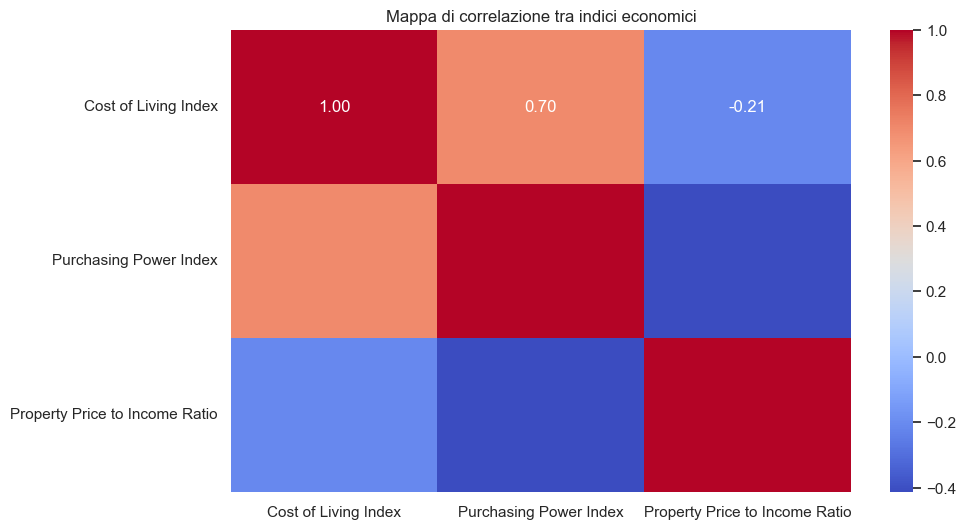

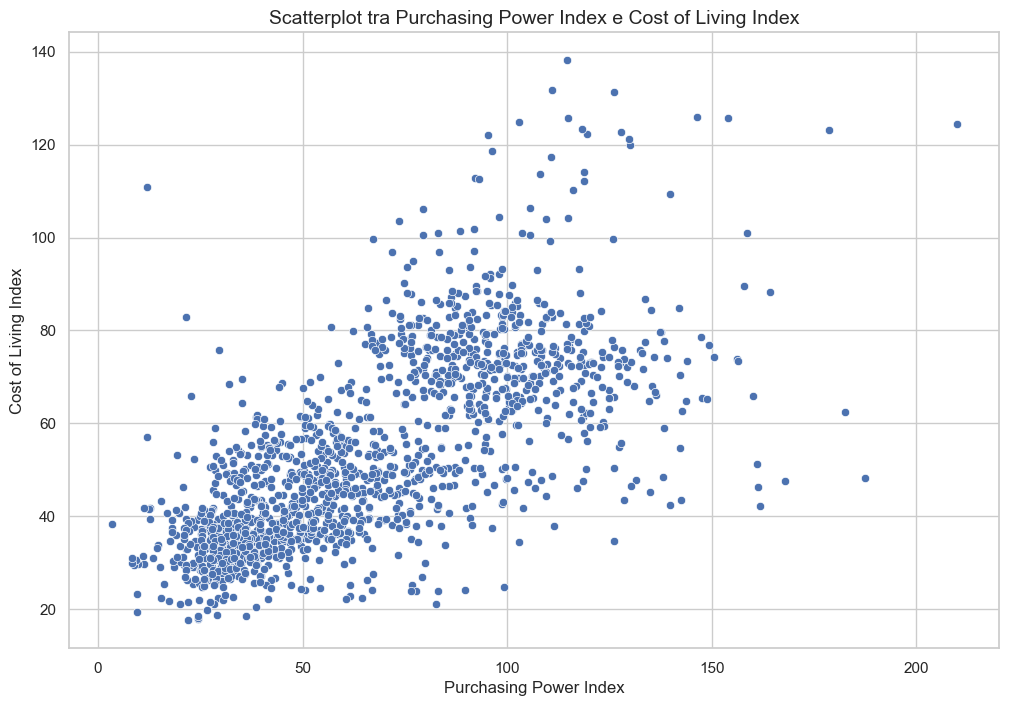

In [297]:
#Ora vediamo la correlazione tra Purchasing Power Index e il Cost of Living Index e Quality of Life index
columns_of_interest = ["Cost of Living Index", "Purchasing Power Index", "Property Price to Income Ratio"]
correlation_economical_index = df[columns_of_interest].corr()
print(correlation_economical_index)

#Grafico correlazione
plt.figure(figsize=(10,6))
sns.heatmap(correlation_economical_index, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mappa di correlazione tra indici economici")
plt.yticks(rotation=360)
plt.show()
#Il costo della vita è correlato strettamente al potere d'acquisto ma meno al rapporto tra costo proprietà e stipendio


#Ora mostro in uno scatterplot la relazione tra Purchasing Power Index e Cost of Living Index
plt.figure(figsize=(12,8))
sns.scatterplot(x="Purchasing Power Index", y="Cost of Living Index", data=df)

plt.title("Scatterplot tra Purchasing Power Index e Cost of Living Index", fontsize=14)
plt.xlabel("Purchasing Power Index", fontsize=12)
plt.ylabel("Cost of Living Index", fontsize=12)

plt.show()


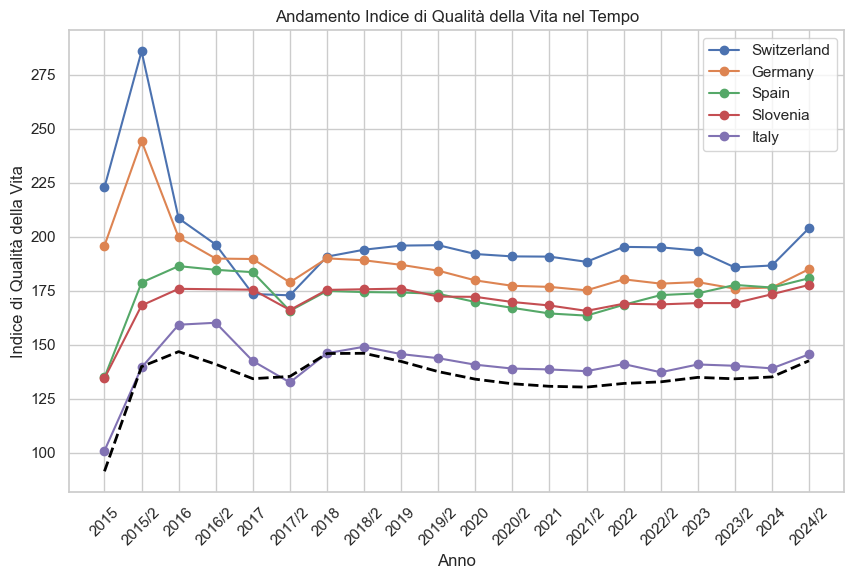

In [298]:
#Facciamo un grafico che calcoli l'anamento del "Quality of Life Index" negli stati di ogni nazione.
import matplotlib.pyplot as plt

#individuiamo il "Quality of Life Index" medio per ogni anno
media_anno = df.groupby("Year")["Quality of Life Index"].mean()

#Creiamo GRAFICO
plt.figure(figsize=(10, 6))

#Selezioniamo un campione (casuale) di nazioni modificabile a nostro piacimento:
nazioni_selezionate = ["Switzerland", "Germany", "Spain", "Slovenia", "Italy"]

#Creiamo grafico a linee per nazioni selezionate:
for paese in df["Country"].unique():
    if paese in nazioni_selezionate:
        df_paese = df[df["Country"] == paese]
        plt.plot(df_paese["Year"], df_paese["Quality of Life Index"], label=paese, marker="o")

plt.xlabel("Anno")
plt.ylabel("Indice di Qualità della Vita")
plt.title("Andamento Indice di Qualità della Vita nel Tempo")
plt.legend()
plt.xticks(rotation=45)

#Aggiungo la linea della media globale
plt.plot(media_anno.index, media_anno.values, label="Media Globale", color="black", linestyle="--", linewidth=2)


plt.grid(True)
plt.show()

In [299]:
# Creo un dizionario per memorizzare i DataFrame separati per anno
df_anno = {}  # {2016: (tutti i dati che soddisfano la maschera dell'anno == 2016), 2016/2 : ..., }

lista_anni = df["Year"].unique()

for anno in lista_anni:
    df_anno[anno] = df[df["Year"] == anno]

#Verifichiamo
print(df_anno["2017"])

     Rank      Country  Quality of Life Index  Purchasing Power Index  \
260     1      Austria                  190.4                    95.7   
261     2      Germany                  189.7                   124.9   
262     3      Denmark                  184.9                    98.8   
263     4  New Zealand                  184.7                    89.9   
264     5        Spain                  183.6                    87.9   
..    ...          ...                    ...                     ...   
322    63     Thailand                   57.2                    34.3   
323    64  Philippines                   56.9                    36.0   
324    65     Malaysia                   51.6                    73.3   
325    66      Vietnam                   36.1                    24.8   
326    67    Venezuela                    0.0                     3.3   

     Safety Index  Health Care Index  Cost of Living Index  \
260          80.8               80.9                  71.5   

C:\Users\simon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\simon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



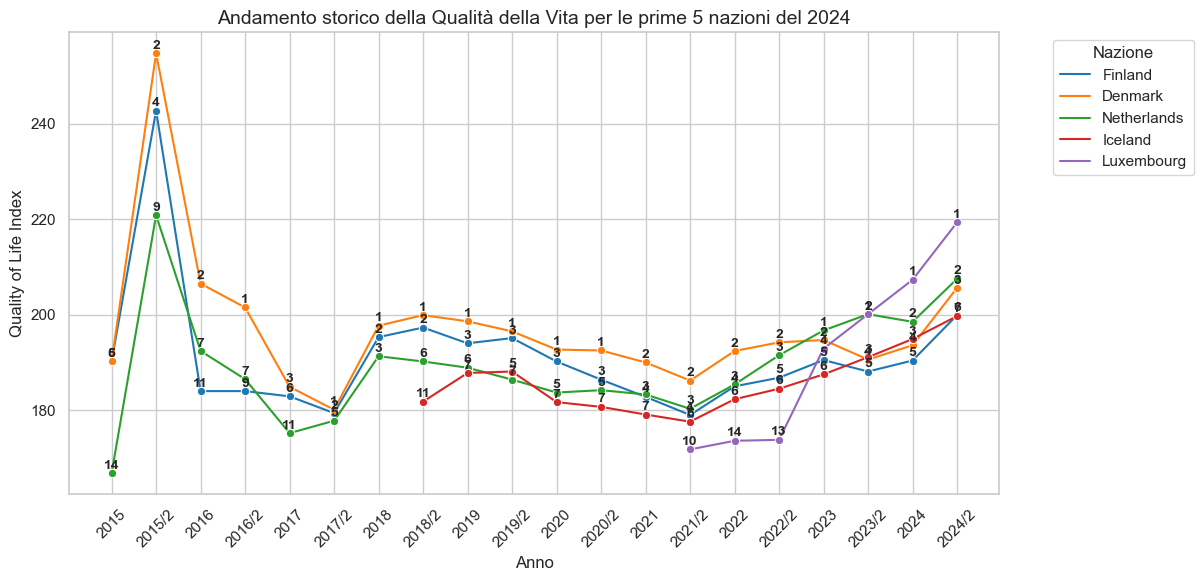

In [300]:
top_countries = df[df["Year"] == "2024"].nlargest(5, "Quality of Life Index")  #nlargest prende prime "n" nazioni in Quality of Life Index
top_countries_list = top_countries["Country"].tolist()  # Lista delle nazioni selezionate


plt.figure(figsize=(12,6))

# Filtriamo i dati per le 10 nazioni selezionate
df_top_history = df[df["Country"].isin(top_countries_list)]

# Creiamo il grafico a linee
sns.lineplot(data=df_top_history, x="Year", y="Quality of Life Index", hue="Country", marker="o", palette="tab10")

# Aggiungo i numerini del ranking sopra i punti
for _, row in df_top_history.iterrows():
    plt.text(row["Year"], row["Quality of Life Index"] + 0.3, str(row["Rank"]), 
             fontsize=10, ha="center", va="bottom", fontweight="bold")

# Aggiungo titolo ee etichette
plt.title("Andamento storico della Qualità della Vita per le prime 5 nazioni del 2024", fontsize=14)
plt.xlabel("Anno")
plt.ylabel("Quality of Life Index")
plt.legend(title="Nazione", bbox_to_anchor=(1.05, 1), loc="upper left")  # Legenda fuori dal grafico
plt.grid(True)
plt.xticks(rotation=45)

plt.show()


       Country  Rank Score
0      Denmark        1718
1  Switzerland        1697
2      Finland        1669
3  Netherlands        1656
4      Austria        1631
5      Germany        1615
6    Australia        1610
7  New Zealand        1572
8       Norway        1543
9       Sweden        1530


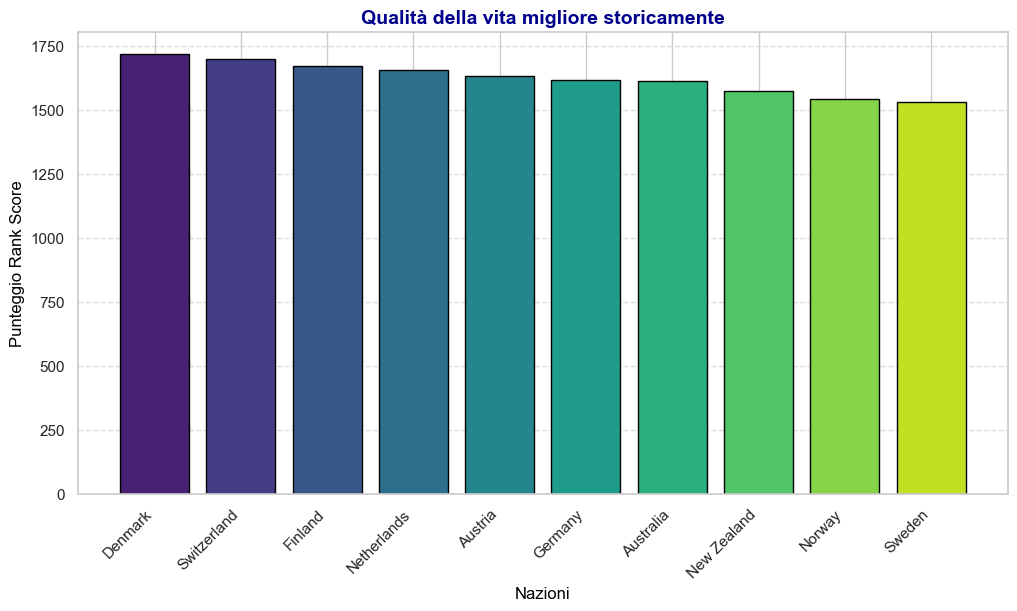

In [301]:
#Valutiamo ora le nazioni più consistenti
#print(df_corr) # Uso questodf perchè contiene rank score che userò per assegnare punteggio che indica la consistenza di risultati in classifica nel tempo
df_ov_best = df_corr.groupby("Country")["Rank Score"].sum().sort_values(ascending=False).reset_index().nlargest(10, "Rank Score")
print(df_ov_best)

#CREO GRAFICO
# Imposta la palette di colori con Seaborn
sns.set(style="whitegrid")
colors = sns.color_palette("viridis", len(df_ov_best))

plt.figure(figsize=(12,6))

plt.bar(df_ov_best["Country"], df_ov_best["Rank Score"], color=colors, edgecolor="black")

plt.title("Qualità della vita migliore storicamente", fontsize=14, fontweight="bold", color="darkblue")
plt.xlabel("Nazioni", fontsize=12, color="black")
plt.ylabel("Punteggio Rank Score", fontsize=12, color="black")

plt.xticks(rotation=45, ha="right")

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

['Denmark', 'Switzerland', 'Finland', 'Netherlands', 'Austria']


C:\Users\simon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\simon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



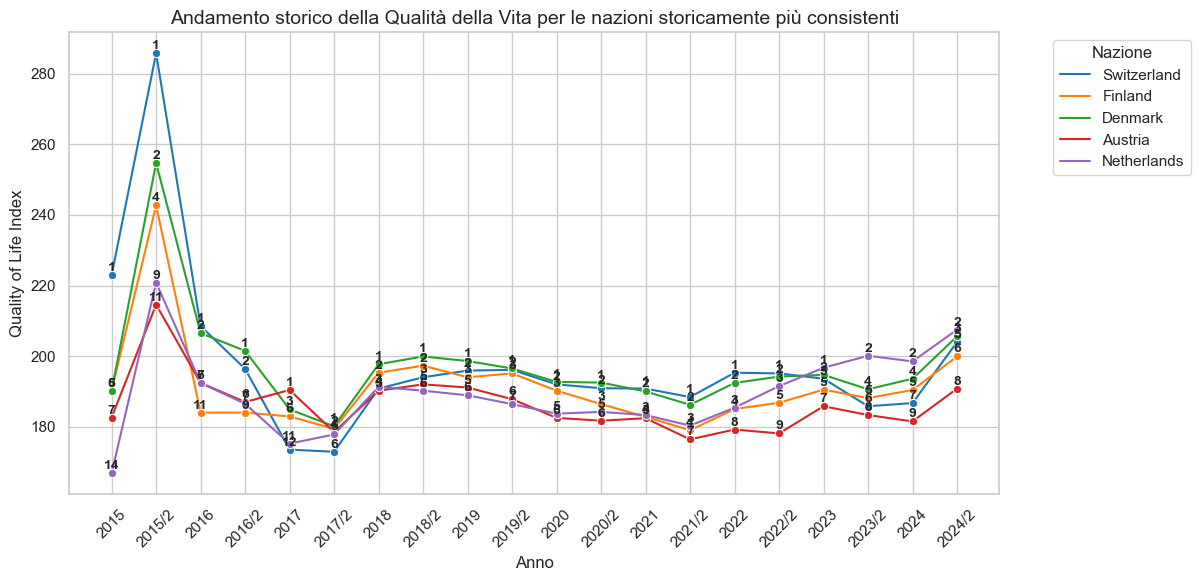

In [302]:
#Sempre in questo modo faccio un grafico a linee
df_ov_best = df_corr.groupby("Country")["Rank Score"].sum().sort_values(ascending=False).reset_index().nlargest(5, "Rank Score")
df_ov_best_list = df_ov_best["Country"].tolist()
print(df_ov_best_list)

plt.figure(figsize=(12,6))

# Filtriamo i dati per le nazioni storicamente migliori
df_top_history = df[df["Country"].isin(df_ov_best_list)]

# Creiamo il grafico a linee
sns.lineplot(data=df_top_history, x="Year", y="Quality of Life Index", hue="Country", marker="o", palette="tab10")

# Aggiungere i numerini del ranking sopra i punti
for _, row in df_top_history.iterrows():
    plt.text(row["Year"], row["Quality of Life Index"] + 0.3, str(row["Rank"]), 
             fontsize=10, ha="center", va="bottom", fontweight="bold")

# Aggiungere titolo e etichette
plt.title("Andamento storico della Qualità della Vita per le nazioni storicamente più consistenti", fontsize=14)
plt.xlabel("Anno")
plt.ylabel("Quality of Life Index")
plt.legend(title="Nazione", bbox_to_anchor=(1.05, 1), loc="upper left")  # Legenda fuori dal grafico
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

In [303]:
#Ora facciamo una analisi per continente aggiungendo colonna "Continent"

#Scarichiamo un file csv che contenga i nomi delle nazioni e i rispettivi continenti
df_continents = pd.read_csv(r"C:\Users\simon\Documents\Datasets\Countries by continents.csv")  
#print(df_continents.head())


df = df.merge(df_continents, on="Country", how="left")  #Unisco i data frame sulla base degli elementi del primo "left"
#print(df)


#Cerco paesi che non hanno continente assegnato
missing_countries = df[df["Continent"].isna()]["Country"].unique()  #Vedo le nazioni che hanno il problema
print("Paesi senza continente:", missing_countries)

#Li sistemo manualmente creando un dizionario che assegna il continente a quelle nazioni

fix_continents = {
    'Czech Republic' : 'Europe',
    'Puerto Rico' : 'North America',
    'Bosnia And Herzegovina' : 'Europe',
    'North Macedonia' : 'Europe',
    'Taiwan (China)' : 'Asia',
    'Hong Kong (China)' : 'Asia'
}

#comando per sistemare df andando a inserire i continenti per le nazione senza continente
df["Continent"] = df["Country"].map(lambda x: fix_continents[x] if x in fix_continents else df.loc[df["Country"] == x, "Continent"].values[0])


print(df)

Paesi senza continente: ['Czech Republic' 'Puerto Rico' 'Bosnia And Herzegovina' 'North Macedonia'
 'Taiwan (China)' 'Hong Kong (China)']
      Rank        Country  Quality of Life Index  Purchasing Power Index  \
0        1    Switzerland                  222.9                   146.5   
1        2        Germany                  195.9                   111.8   
2        3         Sweden                  193.9                   110.9   
3        4  United States                  192.5                   126.1   
4        5        Finland                  190.2                   101.2   
...    ...            ...                    ...                     ...   
1490    79           Peru                   84.6                    34.8   
1491    80           Iran                   80.4                    26.0   
1492    81      Sri Lanka                   75.2                    17.5   
1493    82     Bangladesh                   72.6                    33.1   
1494    83        Nigeria 

Continent
Oceania          183.752500
Europe           153.265816
North America    144.625000
Asia             114.199356
South America    101.765323
Africa            94.439474
Name: Quality of Life Index, dtype: float64


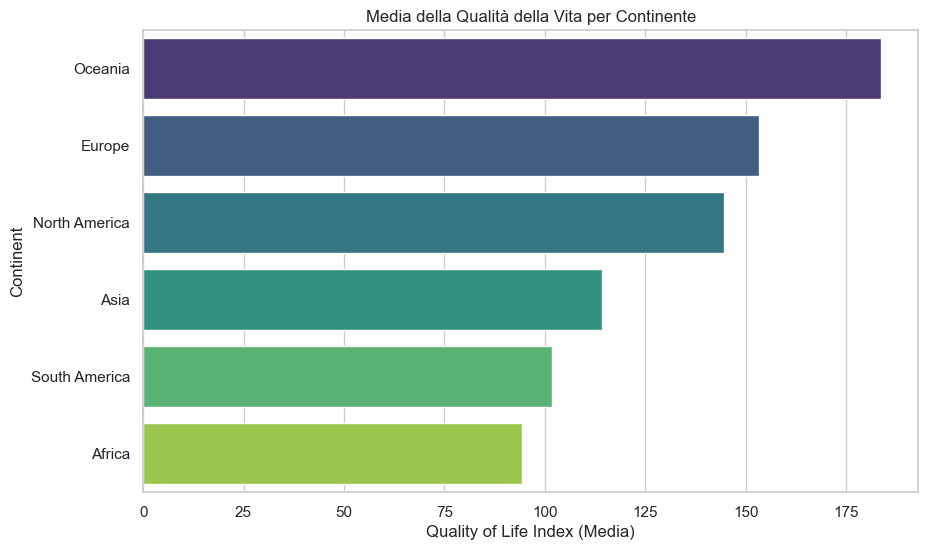

In [304]:
#Creiamo un grafico che ci mostri la media dell'indice sulla qualità della vita per continenti
continent_means = df.groupby(["Continent"])["Quality of Life Index"].mean().sort_values(ascending=False)
print(continent_means)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=continent_means.values, y=continent_means.index, palette="viridis") #Uso values e index perchè non ho fatto reset index quindi i continenti sono indici

plt.xlabel("Quality of Life Index (Media)")
plt.ylabel("Continent")
plt.title("Media della Qualità della Vita per Continente")

# Mostriamo il grafico
plt.show()

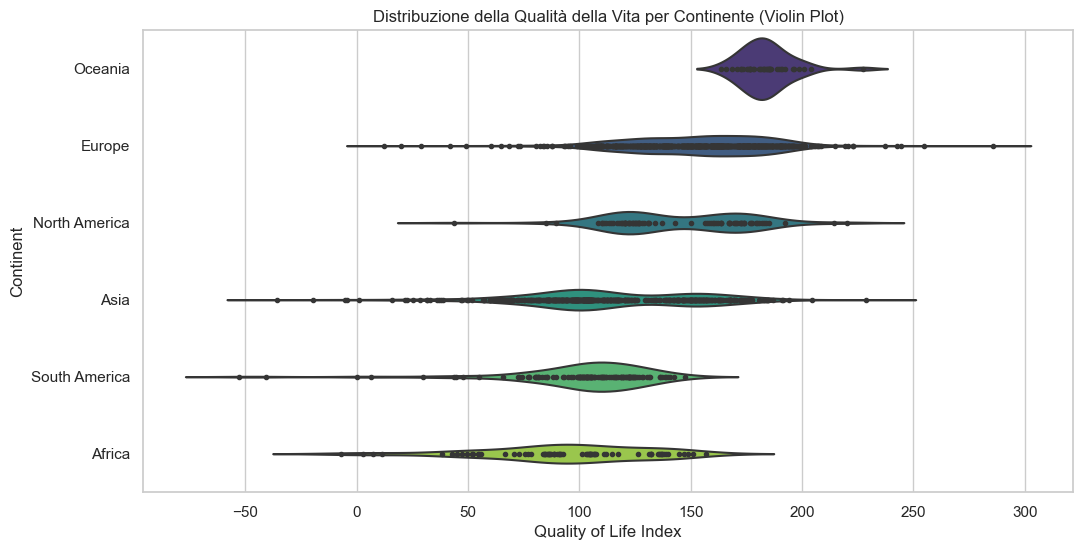

In [305]:
#Uso un grafico a violino per far vedere la distribuzione

#Lo ordino in modo che abbia lo stesso ordine del grafico sopra
continent_means = df.groupby(["Continent"])["Quality of Life Index"].mean().sort_values(ascending=False)
ordered_continents = continent_means.index

plt.figure(figsize=(12, 6))
sns.violinplot(x="Quality of Life Index", y="Continent", data=df, palette="viridis", inner="point", order=ordered_continents)

plt.xlabel("Quality of Life Index")
plt.ylabel("Continent")
plt.title("Distribuzione della Qualità della Vita per Continente (Violin Plot)")

plt.show()
#Vediamo che in europa la qualità della vita può essere sia molto alta che abbastanza bassa, mentre in oceania è mediamente migliore e più consistente

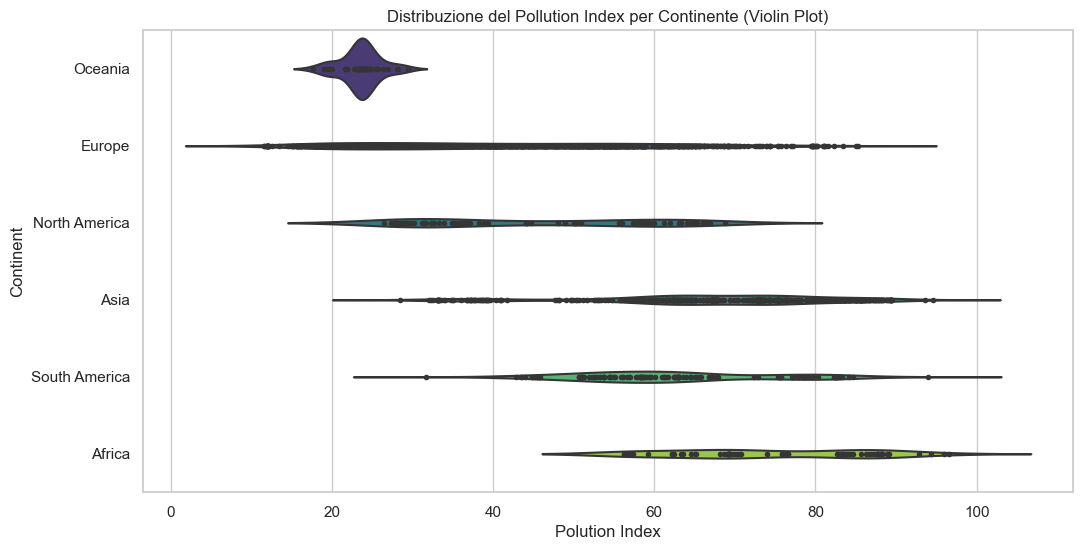

In [306]:
#Avendo visto che i due indici che influenzano maggiormente l'indice sulla qualità della vita sono inquinamento e potere d'acquisto vediamoli singolarmente
continent_means = df.groupby(["Continent"])["Quality of Life Index"].mean().sort_values(ascending=False)
ordered_continents = continent_means.index

plt.figure(figsize=(12, 6))
sns.violinplot(x="Pollution Index", y="Continent", data=df, palette="viridis", inner="point", order=ordered_continents)

plt.xlabel("Polution Index")
plt.ylabel("Continent")
plt.title("Distribuzione del Pollution Index per Continente (Violin Plot)")

plt.show()
#Vediamo che l'oceania è prevedibilmente eccelsa da questo punto di vista.

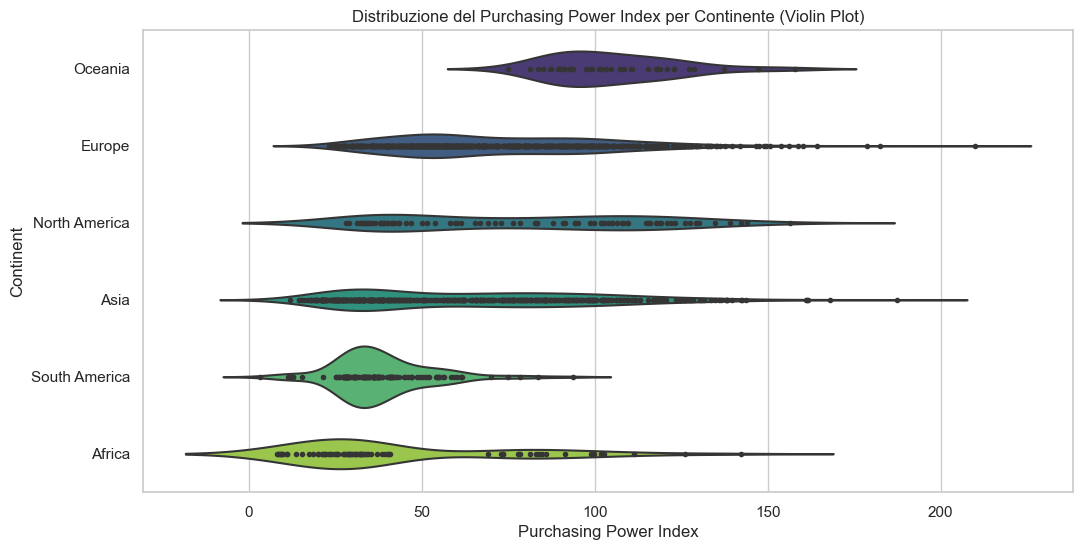

In [307]:
continent_means = df.groupby(["Continent"])["Quality of Life Index"].mean().sort_values(ascending=False)
ordered_continents = continent_means.index

plt.figure(figsize=(12, 6))
sns.violinplot(x="Purchasing Power Index", y="Continent", data=df, palette="viridis", inner="point", order=ordered_continents)

plt.xlabel("Purchasing Power Index")
plt.ylabel("Continent")
plt.title("Distribuzione del Purchasing Power Index per Continente (Violin Plot)")

plt.show()
#Vediamo su questo indice l'oceania rimane buona (la migliore) ma non è così superiore come nell'indice riguardante l'inquinamento.

In [308]:
#Ora analizziamo geograficamente la qualità della vita (nel 2024)

import plotly.express as px

#Filtro il DataFrame per l'anno 2024
df_2024 = df[df["Year"] == "2024"]

#Creo una mappa geografica interattiva con Plotly
import plotly.express as px

fig = px.choropleth(df_2024,
                    locations="Country",  #Colonna con i nomi dei paesi
                    locationmode="country names",  #Modalità di localizzazione per i paesi
                    color="Quality of Life Index",  #Colonna da visualizzare sulla mappa
                    hover_name="Country",  #Dato che appare quando si passa sopra il paese
                    color_continuous_scale="viridis",  #Colori della mappa
                    labels={"Quality of Life Index": "Quality of Life Index (2024)"},  #Etichetta
                    title="Quality of Life Index nel 2024",
                    width=1000,  
                    height=700,  
                    projection="natural earth"  # Tipo di proiezione
)


fig.show()

In [309]:
#Ora facciamo una analisi per vedere se c'è una correlazione tra la popolazione della nazione e la qualità della vita.
#Scarico questo nuovo file csv che contiene dati relativi alla popolazione per country
df_population = pd.read_csv(r"C:\Users\simon\Documents\Datasets\WorldPopulation2023.csv")
#print(df_population)

#Mantengo solo quello che ci serve
df_population = df_population[["Country", "Population2023", "Density(P/Km²)"]]
df_population


#Unisco i df sulla colonna Country
df = df.merge(df_population, on="Country", how="left")  #Unisco i data frame sulla base degli elementi del primo
#Verifico
print(df.head())


#Cerco paesi che non hanno continente assegnato
missing_countries_p = df[df["Population2023"].isna()]["Country"].unique()  #Vedo le nazioni che hanno il problema
print("Paesi senza valore popolazione:", missing_countries_p)


#Verifico di aver fatto correttamente
df = df.dropna(subset=["Population2023"])
missing_countries_p = df[df["Population2023"].isna()]["Country"].unique()  #Vedo le nazioni che hanno il problema
print("Paesi senza valore popolazione:", missing_countries_p)


   Rank        Country  Quality of Life Index  Purchasing Power Index  \
0     1    Switzerland                  222.9                   146.5   
1     2        Germany                  195.9                   111.8   
2     3         Sweden                  193.9                   110.9   
3     4  United States                  192.5                   126.1   
4     5        Finland                  190.2                   101.2   

   Safety Index  Health Care Index  Cost of Living Index  \
0          73.2               66.3                 126.0   
1          71.5               75.6                  76.3   
2          57.9               76.3                  82.9   
3          50.0               67.8                  76.5   
4          70.5               69.4                  89.7   

   Property Price to Income Ratio  Traffic Commute Time Index  \
0                             7.3                        25.6   
1                             6.6                        31.1   
2    

                       Quality of Life Index  Population2023  Density(P/Km²)
Quality of Life Index               1.000000       -0.204420       -0.057785
Population2023                     -0.204420        1.000000       -0.027837
Density(P/Km²)                     -0.057785       -0.027837        1.000000


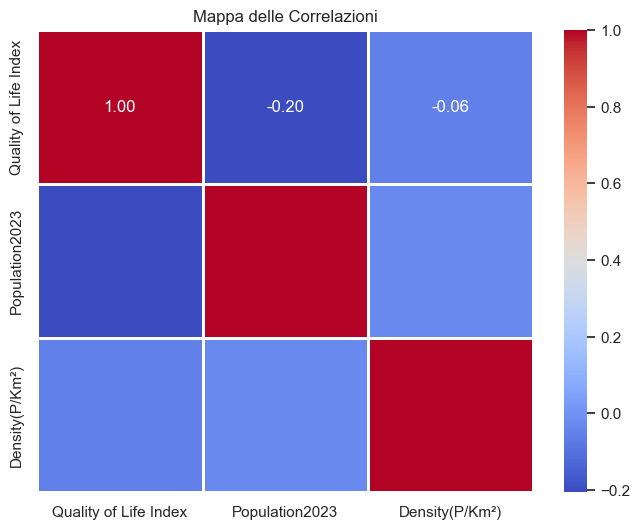

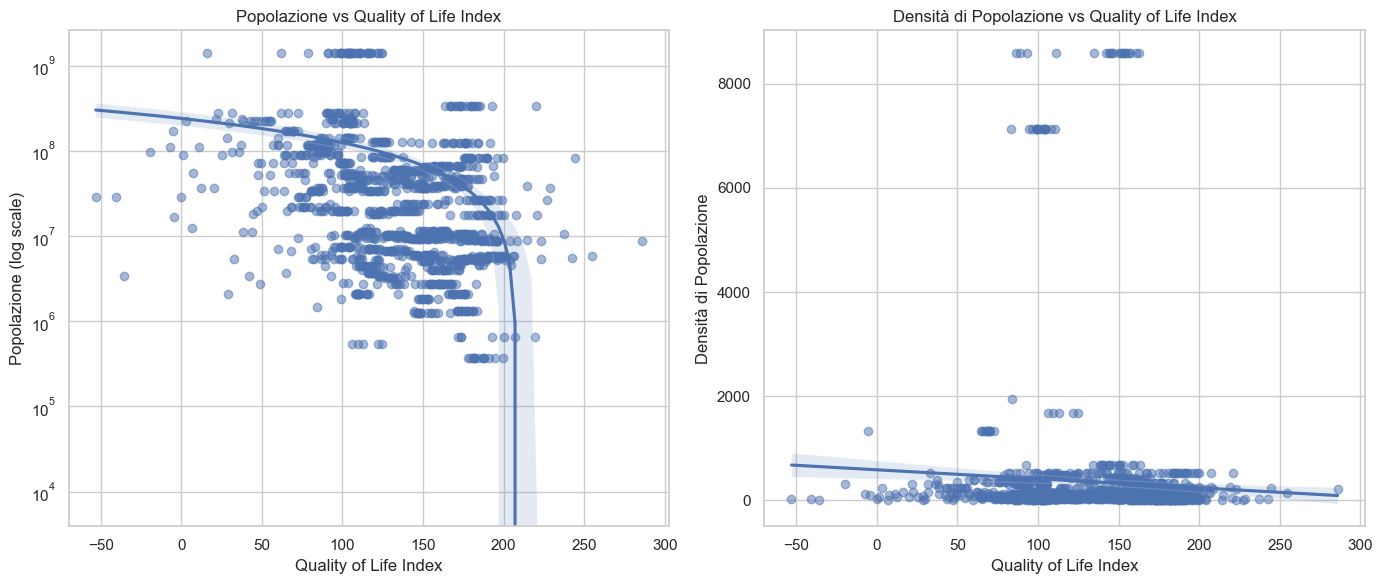

In [310]:
#Analizzo correlazione tra popolazione e densità di popolazione e qualità della vita
pop_correlations = df[["Quality of Life Index", "Population2023", "Density(P/Km²)"]].corr()
print(pop_correlations)

#Grafico correlazioni
plt.figure(figsize=(8,6))
sns.heatmap(pop_correlations, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)

plt.title("Mappa delle Correlazioni")
plt.show()


#Scatterplot con regressione con sia la popolazione sia la densità (sarà inutile la linea di regressione per i risultati ottenuti)
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Popolazione totale vs Qualità della vita
sns.regplot(ax=axes[0], x=df["Quality of Life Index"], y=df["Population2023"], scatter_kws={"alpha": 0.5})
axes[0].set_title("Popolazione vs Quality of Life Index")
axes[0].set_ylabel("Popolazione (log scale)")
axes[0].set_xlabel("Quality of Life Index")
axes[0].set_yscale("log")

# Densità di popolazione vs Qualità della vita
sns.regplot(ax=axes[1], x=df["Quality of Life Index"], y=df["Density(P/Km²)"], scatter_kws={"alpha": 0.5})
axes[1].set_title("Densità di Popolazione vs Quality of Life Index")
axes[1].set_ylabel("Densità di Popolazione")
axes[1].set_xlabel("Quality of Life Index")

plt.tight_layout()
plt.show()

#Come si evinceva già dalla mappa delle correlazioni non c'è correlazione tra i due parametri. I grafici successivi confermano.